## **Implementation of Lasso Regression From Scratch using Python**



Lasso Regression: Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction.

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Gradient for Weights

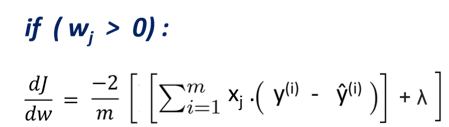

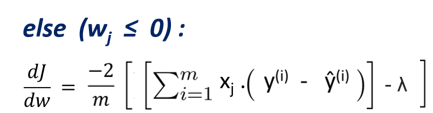

Gradient for Bias

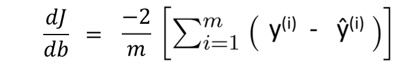

In this, we will train a Lasso Regression model to learn the correlation between the number of years of experience of each employee and their respective salary. Once the model is trained, we will be able to predict the salary of an employee on the basis of his years of experience.

Importing the Dependencies

In [1]:
import numpy as np

Lasso Regression

In [32]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b




Using Linear Regression model for Prediction

In [3]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

Data Pre-Processing

In [5]:
# loading the data from csv file to a pandas dataframe

salary_data = pd.read_csv('/content/salary_data.csv')

In [6]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [9]:
#check data type of each column
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [10]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
#describe of data into statical form
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


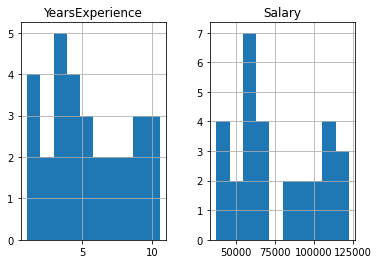

In [12]:
#Histogram on salary dataset
salary_data.hist()
plt.show()

Splitting the feature & target

In [13]:
features = salary_data.iloc[:,:-1].values      
target = salary_data.iloc[:,1].values

In [14]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [15]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, 
                                                    test_size=0.33, 
                                                    random_state = 2)

Training the Lasso Regression model

In [17]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,
                         lambda_parameter=200)

In [18]:
model.fit(X_train, Y_train)

Predict the salary value for test data

In [19]:
test_data_prediction = model.predict(X_test)

In [20]:
print(test_data_prediction)

[ 36068.90441536  34166.14804787  66513.00629512  58901.98082518
  91248.83907243  80783.67905126 101713.9990936   52242.33353898
  42728.55170156  88394.7045212 ]


In [26]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)


print("R squared error : ", score_1)


R squared error :  0.9041366551714738


Comparing the error with SKLearn Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [29]:
sk_model.fit(X_train, Y_train)

Lasso()

In [30]:
sk_test_data_prediction = sk_model.predict(X_test)

In [31]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

print("R squared error : ", score_1_)


R squared error :  0.9041817142395875
